In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
# import xesmf as xe

In [2]:
file_base = "ERS_Ld110.f45_f45_mg37.2000_DATM%GSWP3v1_CLM51%FATES_SICE_SOCN_SROF_SGLC_SWAV.cheyenne_intel.clm-FatesColdNoComp.issue1051_d110_f45_dev142.clm2.h0.2000-01-01-00000.nc.base"
file_rest = "ERS_Ld110.f45_f45_mg37.2000_DATM%GSWP3v1_CLM51%FATES_SICE_SOCN_SROF_SGLC_SWAV.cheyenne_intel.clm-FatesColdNoComp.issue1051_d110_f45_dev142.clm2.h0.2000-01-01-00000.nc.rest"

In [3]:
ds_base = xr.open_dataset(file_base)
ds_rest = xr.open_dataset(file_rest)

In [4]:
CBE_base = ds_base.FATES_CBALANCE_ERROR
CBE_rest = ds_rest.FATES_CBALANCE_ERROR

In [18]:
CBE_diff

<xarray.DataArray 'FATES_CBALANCE_ERROR' (lat: 46, lon: 72)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ...,  0.,  0., nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    time     object 2000-02-27 00:00:00
  * lon      (lon) float64 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
  * lat      (lat) float64 -90.0 -86.0 -82.0 -78.0 -74.0 ... 78.0 82.0 86.0 90.0

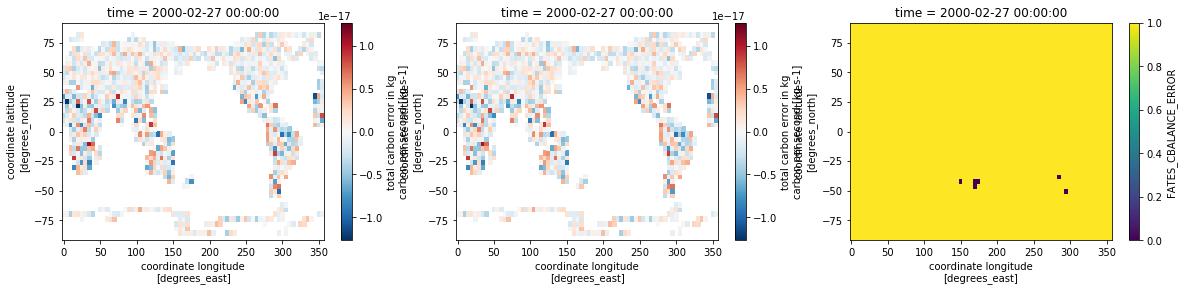

In [40]:
time_idx = 57
fig, axs = plt.subplots(ncols=3,figsize=(20,4))
CBE_base.isel(time=time_idx).plot(ax=axs[0])
CBE_rest.isel(time=time_idx).plot(ax=axs[1])
CBE_diff = abs(CBE_rest.isel(time=time_idx)-CBE_base.isel(time=time_idx))
mask_diff = CBE_diff.where((CBE_diff.where(CBE_diff != 0)) >0, 1)
mask_diff.plot(ax=axs[2])
# mask_diff.where(CBE_diff < 0).plot(ax=axs[2])

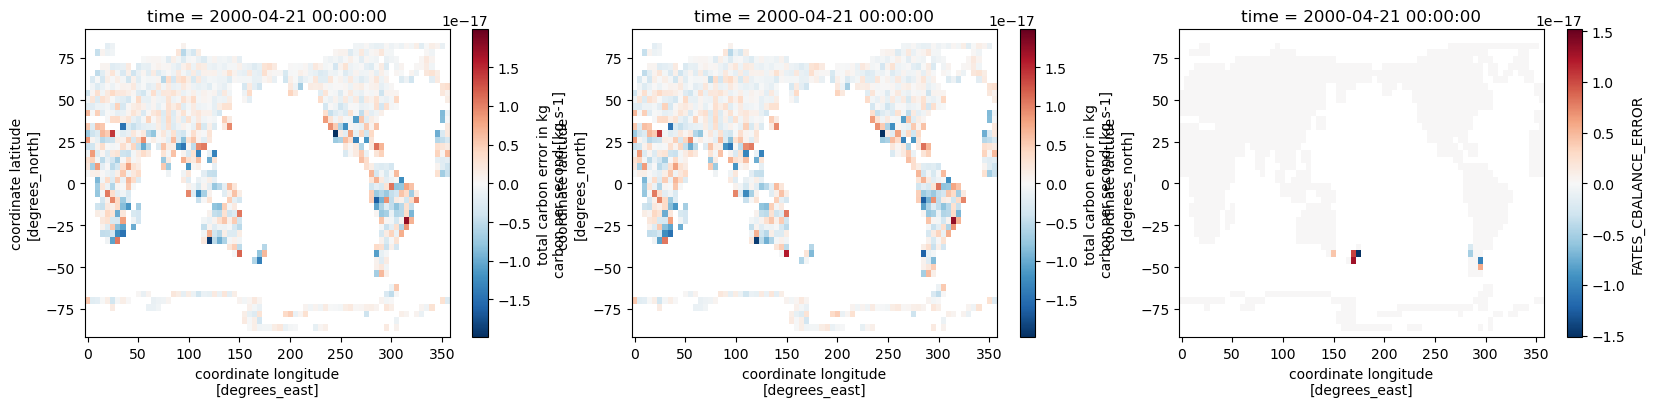

In [21]:
time_idx = 110
fig, axs = plt.subplots(ncols=3,figsize=(20,4))
CBE_base.isel(time=time_idx).plot(ax=axs[0])
CBE_rest.isel(time=time_idx).plot(ax=axs[1])
CBE_diff = CBE_rest.isel(time=time_idx)-CBE_base.isel(time=time_idx)
CBE_diff.plot(ax=axs[2])